## 3.2 Gradient Descent

Loss function $$J(w) = \frac{1}{n} \sum \limits_{i=1} ^{n} (y^{i}-\hat{y^{i}}) $$
where n is the number of samples, $y^{i}$ are the observed values, $\hat{y^{i}}$ are the predicted values

In [287]:
import pickle
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [288]:
## load data
def load_data():
    df = pd.read_csv('normalized.txt', header=None)
    df.columns = ['area', 'bdrm', 'price']
    df ['intercept'] = 1
    X = df[['intercept', 'area', 'bdrm']].values
    y = df['price'].values
    return X, y

In [289]:
def compute_error(pred, truth):
    # compute the mean squared error
    
    ## to do
    total = 0
    for i in range(len(pred)):
        total += (truth[i] - pred[i])**2
    MSE = total / len(pred)
    return float(MSE)

In [290]:
def compute_grad(X,y,w):
    # compute the gradient
    
    ## to do
    XTXw = ((X.T).dot(X)).dot(w).reshape(3,1)
    XTY = (X.T).dot(y).reshape(3,1)
    gradlis = XTXw - XTY  # [w0 w1 w2]  gradlis.shape = (3,1)
#     w = w - learning_rate * gradlis
    return gradlis / len(y)

In [291]:
## training with gradient descent
def train(X, y, learning_rate, max_num_iter=1000):
    """
    write a function which apply Gradient descent to estimate parameter w
    Please also record the mean squared error in the iteration process and save it to error history
    """
    error_history = []
    
    # initialize w
    num_dim = len(X[0])
    w = np.zeros((num_dim, 1), dtype=np.float32) # w.shape = (num_dim,1)
    
    # ensure dimension is 2-dim
    y = y.reshape(y.shape[0], 1)
    
    for steps in range(max_num_iter):
        # compute gradient descent over all training examples
        # perform gradient descent (vector update)
        # get predictions
        # compute MSE and add it into error_history
        
        ## to do
        pred = X.dot(w)
        MSE = compute_error(pred, y)
        error_history.append(MSE)
        grad = compute_grad(X,y,w)
        
        
        wNext = w - learning_rate * grad
        predNext = X.dot(wNext)
        MSENext = compute_error(predNext, y)
        
        
        if MSE - MSENext < 0:
            print('Not Decreasing!')
            print(error_history)
            break
        if MSE - MSENext < 1e-15:
            break
            
        w = wNext
        
    return w, error_history

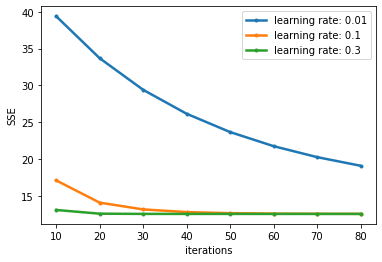

In [292]:
## fit regression model and plot the SSE vs. number of iterations
X, y = load_data()

learning_rates = ['0.01', '0.1', '0.3']
endingW = [] # 存储各learning rate的list 共3项 每项是一个(3,1)的array
endingMSE = [] # 存储各learning rate的list 共3项 每项是一个(3,1)的array

for idx in range(len(learning_rates)):
    w, error_history = train(X, y, float(learning_rates[idx]), max_num_iter=1000)
    endingW.append(w)
    endingMSE.append(error_history[-1])

    iterations = [10,20,30,40,50,60,70,80]
    iterToPlot = []
    SSEtoPlot = []
    for iteration in iterations:
        if iteration < len(error_history):
            iterToPlot.append(iteration)
            SSEtoPlot.append(error_history[iteration] * len(X))
    plt.plot(iterToPlot, SSEtoPlot, '.-',linewidth=2.5, label='learning rate: ' + learning_rates[idx])

plt.xlabel('iterations')
plt.ylabel('SSE')
plt.legend(loc='upper right')
plt.show()

## 3.3 Make prediction based on the linear regression model you get

In [293]:
# get the values used for normalization
f = open('mean_std.pk', 'rb')
norm_params = pickle.load(f)
l, b, p = norm_params['area'], norm_params['n_bedroom'], norm_params['price']
f.close()

In [295]:
# first normalize the features and then make predictions

## to do
# print(l['mean'],b,p)

optimalIdx = endingMSE.index(min(endingMSE))
optimalW = endingW[optimalIdx]

para_mean = [l['mean'], b['mean'], p['mean']]
para_std = [l['std'], b['std'], p['std']]

newXlis = [1, 3150, 4]
for i in range(1,len(newXlis)):
    newXlis[i] = (newXlis[i] - para_mean[i-1]) / para_std[i-1]
nor_newX = np.array(newXlis)  # (3,) 1D array

nor_pred = nor_newX.dot(optimalW)
pred_price = nor_pred * para_std[-1] + para_mean[-1]
w = optimalW.reshape(3,)

# print out the predicted value
print("The w is {}, and pred_price is {}\n".format(w, pred_price))

The w is [-7.94998101e-17  8.84765927e-01 -5.31787587e-02], and pred_price is [493159.45353837]

